
## <span style="color:orange">- Загружаем дата-сет и импортируем все библиотеки</span>


In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

import pandas_datareader as pdr
from datetime import datetime

import seaborn as sns
import scipy.special as sps
from scipy import * 
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
import statsmodels.api as sm

import scipy.stats

import sklearn
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor

In [2]:
insurance = pd.read_csv("Data/insurance.csv")
insurance [:5]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance.info()
#Опишем дата-сет и переменные
#Дата-сет состоит из 1338 наблюдений (людей), даны демографические и личностные характеристики
#'age' - возраст человека;
#'sex' - пол;
#'bmi' - индекс массы тела;
#'children' - кол-во детей;
#'smoker' - категориальная переменная о статусе курения;
#'region' - регион проживания;
#'charges' - сумма трат на мед. страховку в год.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Также мы имеем 2 целочисленные переменные, 3 объектные, и 2 перменные формата float**

## <span style="color:orange">- Представим примерный дизайн исследования практической работы:</span>
-   **Описательная статистика**
-   **Наблюдения**
-   **Работа с дата-сетом (пропуски, выборосы, распределение данных)**
-   **Интеграция новых переменных**
-   **Корреляционный анализ**

## <span style="color:blue">- Описательная статистика</span>


In [4]:
insurance.describe()
#Key insights:
#Средний возраст - 39 лет, от 18 до 64
#Средний bmi выше нормального
#Кол-во детей от 0 до 5
#Сумма затрат на страховку от 1121$ до 63770$

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Поработаем с категориальными перменными и опишем их 

<AxesSubplot:xlabel='region'>

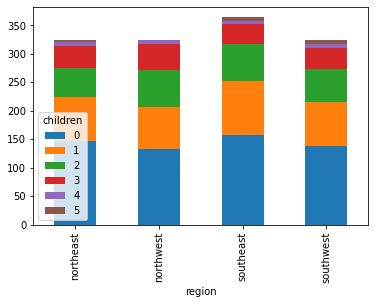

In [5]:
insurance.groupby('region')['children'].value_counts().unstack().plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='smoker'>

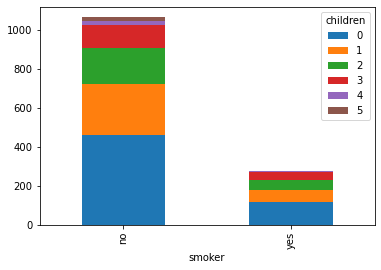

In [6]:
insurance.groupby('smoker')['children'].value_counts().unstack().plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='smoker'>

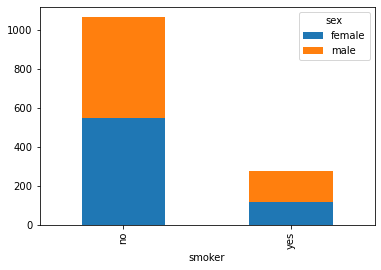

In [7]:
insurance.groupby('smoker')['sex'].value_counts().unstack().plot(kind='bar', stacked = True)

### Из предварительных данных видим, что выявленных отличительных особенностей нет, требуется ввести новые переменные 

## <span style="color:orange">- Введем новые переменные</span>
-   **Многодетный**
-   **Нормальный BMI**
-   **Healthy lifestyle**
-   **Категоризация трат на страховку**


### Создаем категории для кол-ва детей

In [8]:
def  get_children_cat(children):
    if children ==0:
        return 'No Children'
    elif children in range (0,3):
        return 'Normal'
    elif children > 2:
        return 'Many Children'
    else:
            return children

In [9]:
insurance['category children'] = insurance['children'].apply(get_children_cat)

In [10]:
insurance['category children'] = pd.Categorical(insurance['category children'])

In [11]:
insurance['category children'].value_counts()
#574 - бездетных, 564 - 1-2 ребенка, 200 - многодетных

No Children      574
Normal           564
Many Children    200
Name: category children, dtype: int64

In [12]:
insurance.groupby('category children')['age'].mean()
#средний возраст почти одинаков

category children
Many Children    40.710000
No Children      38.444251
Normal           39.450355
Name: age, dtype: float64

<AxesSubplot:xlabel='category children'>

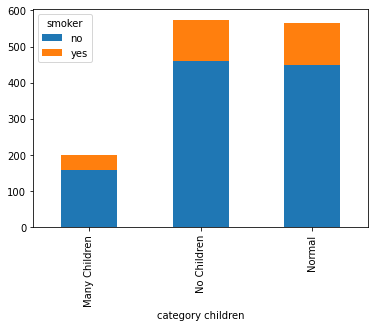

In [13]:
insurance.groupby('category children')['smoker'].value_counts().unstack().plot(kind='bar', stacked = True)
#курильщиков также примерно одинаковое количестве в каждой из категорий кол-ва детей

In [14]:
insurance.smoker.replace(('yes', 'no'), (1, 0), inplace=True)
insurance[:5]

#переведем куришьщиков из yes/no в категорийные 1/0

,age,sex,bmi,children,smoker,region,charges,category children
0,19,female,27.900,0,1,southwest,16884.92400,No Children
1,18,male,33.770,1,0,southeast,1725.55230,Normal
2,28,male,33.000,3,0,southeast,4449.46200,Many Children
3,33,male,22.705,0,0,northwest,21984.47061,No Children
4,32,male,28.880,0,0,northwest,3866.85520,No Children


In [15]:
insurance.groupby('category children')['smoker'].mean()
#курильщиков также равное количество в каждой из категории кол-ва детей

category children
Many Children    0.215000
No Children      0.200348
Normal           0.205674
Name: smoker, dtype: float64



## <span style="color:orange">- На данный момент можно предположить, что дата-сет, с которым осуществляется работа, может быть случайно сгенерированным, так как его данные слишком гомогенные. Требуется дальнейшая проверка</span>

### Создаем категории для нормального BMI *

*Нормальный BMI находится в диапозоне от 18 до 25



<AxesSubplot:>

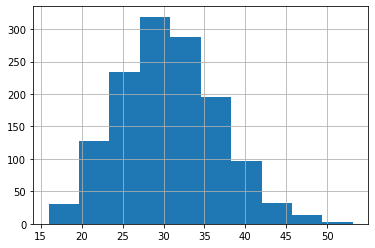

In [16]:
insurance['bmi'].hist()

In [17]:
insurance['bmi'] = np.round(insurance['bmi'])
insurance

,age,sex,bmi,children,smoker,region,charges,category children
0,19,female,28.0,0,1,southwest,16884.92400,No Children
1,18,male,34.0,1,0,southeast,1725.55230,Normal
2,28,male,33.0,3,0,southeast,4449.46200,Many Children
3,33,male,23.0,0,0,northwest,21984.47061,No Children
4,32,male,29.0,0,0,northwest,3866.85520,No Children
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,0,northwest,10600.54830,Many Children
1334,18,female,32.0,0,0,northeast,2205.98080,No Children
1335,18,female,37.0,0,0,southeast,1629.83350,No Children
1336,21,female,26.0,0,0,southwest,2007.94500,No Children


In [18]:
insurance['bmi'].apply(lambda x: 1 if x in range(17,26) else 0 ).value_counts()

0    1059
1     279
Name: bmi, dtype: int64

In [19]:
insurance['bmi_cat'] = insurance['bmi'].apply(lambda x: 1 if x in range(17,26) else 0 )
insurance[:5]

,age,sex,bmi,children,smoker,region,charges,category children,bmi_cat
0,19,female,28.0,0,1,southwest,16884.92400,No Children,0
1,18,male,34.0,1,0,southeast,1725.55230,Normal,0
2,28,male,33.0,3,0,southeast,4449.46200,Many Children,0
3,33,male,23.0,0,0,northwest,21984.47061,No Children,1
4,32,male,29.0,0,0,northwest,3866.85520,No Children,0


##### Переведем остальные объектные переменные в категорийные

In [20]:
level_map = {'female': 0, 'male': 1}
insurance['sex_cat'] = insurance.sex.map(level_map)
insurance[:5]

,age,sex,bmi,children,smoker,region,charges,category children,bmi_cat,sex_cat
0,19,female,28.0,0,1,southwest,16884.92400,No Children,0,0
1,18,male,34.0,1,0,southeast,1725.55230,Normal,0,1
2,28,male,33.0,3,0,southeast,4449.46200,Many Children,0,1
3,33,male,23.0,0,0,northwest,21984.47061,No Children,1,1
4,32,male,29.0,0,0,northwest,3866.85520,No Children,0,1


In [21]:
insurance.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [22]:
level_map = {'southwest': 0, 'southeast': 1,'northwest': 2,'northeast': 3}
insurance['region_cat'] = insurance.region.map(level_map)
insurance[:5]

,age,sex,bmi,children,smoker,region,charges,category children,bmi_cat,sex_cat,region_cat
0,19,female,28.0,0,1,southwest,16884.92400,No Children,0,0,0
1,18,male,34.0,1,0,southeast,1725.55230,Normal,0,1,1
2,28,male,33.0,3,0,southeast,4449.46200,Many Children,0,1,1
3,33,male,23.0,0,0,northwest,21984.47061,No Children,1,1,2
4,32,male,29.0,0,0,northwest,3866.85520,No Children,0,1,2


In [23]:
level_map = {'No Children': 0, 'Normal': 1,'Many Children': 2}
insurance['children_cat'] = insurance['category children'].map(level_map)
insurance[:5]

,age,sex,bmi,children,smoker,region,charges,category children,bmi_cat,sex_cat,region_cat,children_cat
0,19,female,28.0,0,1,southwest,16884.92400,No Children,0,0,0,0
1,18,male,34.0,1,0,southeast,1725.55230,Normal,0,1,1,1
2,28,male,33.0,3,0,southeast,4449.46200,Many Children,0,1,1,2
3,33,male,23.0,0,0,northwest,21984.47061,No Children,1,1,2,0
4,32,male,29.0,0,0,northwest,3866.85520,No Children,0,1,2,0


## Создадим переменную здорового человека

In [24]:
insurance['healthy person'] = np.where((insurance['bmi_cat'] == 1) &
         (insurance['smoker'] == 0), 1, 0)
insurance['healthy person'].sum()

218

In [25]:
218/1338

#16,2% являются людьми, которых можно причислить к здоровым

0.16292974588938713

<AxesSubplot:ylabel='charges'>

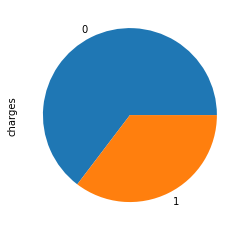

In [26]:
insurance.groupby('healthy person')['charges'].mean().plot(kind = 'pie')

#здоровые люди в этом дата-сете тратят меньше денег на страховку

## Сделаем категоризация трат на страховку

In [27]:
insurance['charges'] = np.round(insurance['charges'])
insurance

,age,sex,bmi,children,smoker,region,charges,category children,bmi_cat,sex_cat,region_cat,children_cat,healthy person
0,19,female,28.0,0,1,southwest,16885.0,No Children,0,0,0,0,0
1,18,male,34.0,1,0,southeast,1726.0,Normal,0,1,1,1,0
2,28,male,33.0,3,0,southeast,4449.0,Many Children,0,1,1,2,0
3,33,male,23.0,0,0,northwest,21984.0,No Children,1,1,2,0,1
4,32,male,29.0,0,0,northwest,3867.0,No Children,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,0,northwest,10601.0,Many Children,0,1,2,2,0
1334,18,female,32.0,0,0,northeast,2206.0,No Children,0,0,3,0,0
1335,18,female,37.0,0,0,southeast,1630.0,No Children,0,0,1,0,0
1336,21,female,26.0,0,0,southwest,2008.0,No Children,0,0,0,0,0


<AxesSubplot:>

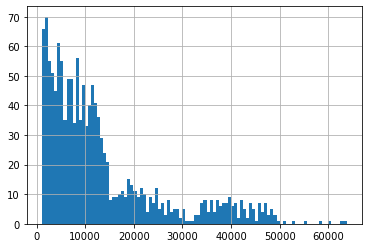

In [28]:
insurance['charges'].hist(bins = 100)

#визуально можем наблюдать 3 группы трат (- 15000, 15000 - 32000, 32000+). Проверим на данных

In [29]:
def charges_described(df = insurance, column = 'charges'):
    print('Базовые метрики:  ')
    print(df[column].describe())
    print ('-----------------')
    
    print('Самые популярные значения, топ 5')
    print(df[column].value_counts().nlargest(5))
    print('-----------------')
    
    print('КЭ', kurtosis(df[column]))
    print('КА', skew(df[column]))
    
    sns.displot(df[column])
    plt.title('Распределение значений')

Базовые метрики:  
count     1338.000000
mean     13270.414798
std      12110.012882
min       1122.000000
25%       4740.000000
50%       9382.000000
75%      16640.000000
max      63770.000000
Name: charges, dtype: float64
-----------------
Самые популярные значения, топ 5
1632.0     3
11658.0    3
7419.0     2
13471.0    2
3353.0     2
Name: charges, dtype: int64
-----------------
КЭ 1.5958090881954208
КА 1.514177007166237


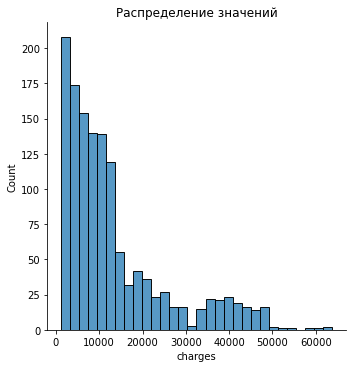

In [30]:
charges_described(df = insurance, column = 'charges')

Text(0.5, 1.0, 'charges')

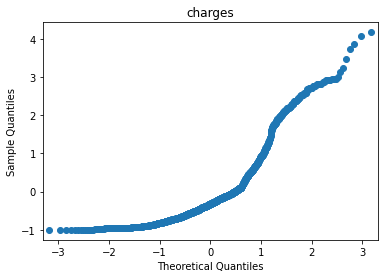

In [31]:
sm.qqplot(insurance['charges'], fit = True)
plt.title('charges')



##### <span style="color:blue">- График распределения и график квантиль-квантиль демонстрируют ненормальное распределение трат на страховку, что условжняет категоризацию переменной. Тем не менее, далее перменная будет сгруппирована</span>

In [32]:
insurance.charges.describe()

#Прежде чем категоризировать charges, избавимся от выбросов

count     1338.000000
mean     13270.414798
std      12110.012882
min       1122.000000
25%       4740.000000
50%       9382.000000
75%      16640.000000
max      63770.000000
Name: charges, dtype: float64

<AxesSubplot:>

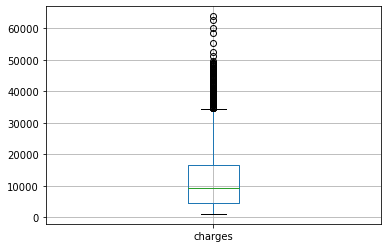

In [33]:
insurance.boxplot(column=['charges'])
#boxplot и qqplot показывают, что вероятно присутствуеют несколько выбросов. Проверим далее

In [34]:
def my_norm_confidence(df=insurance, column = 'charges', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

In [35]:
confidence = my_norm_confidence()

Text(0.5, 1.0, 'Доверительный интервал')

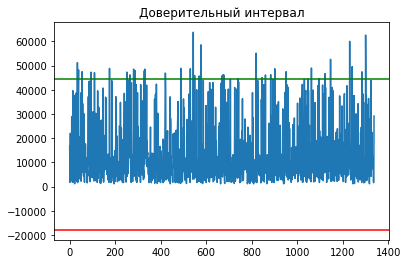

In [36]:
insurance.charges.plot()
plt.axhline(y = confidence[1], color = 'g', linestyle = '-')
plt.axhline(y = confidence[0], color = 'r', linestyle = '-')
plt.title('Доверительный интервал')

#При данном способе мы можем потерять много наблюдений



##### <span style="color:blue">- Из-за крайне не нормального распределения, мы понимамем, что данный способ избавления от выбросов для нас не релевантен</span>

In [37]:
def find_anomaly(df = insurance, column = 'charges'): 
    upper_level = df[column].mean() + 3 * df[column].std()
    lower_level = df[column].mean() - 3 * df[column].std()
    anomaly = df[(df[column] > upper_level) & (df[column] < lower_level)]
    return upper_level, lower_level, anomaly

In [38]:
anomaly = find_anomaly(df = insurance, column = 'charges')
anomaly

(49600.45344511768,
 -23059.623848705123,
 Empty DataFrame
 Columns: [age, sex, bmi, children, smoker, region, charges, category children, bmi_cat, sex_cat, region_cat, children_cat, healthy person]
 Index: [])

In [39]:
insurance['Anomaly_big'] = np.where(insurance['charges'] < anomaly[0], 1, 0)
insurance[insurance['Anomaly_big'] == 0]

#В рамках данного способа нам следует избавиться от 7 выбросов:
#Попробуем последний способ - z-score. 3sigma при таком распределении неактуальна.

,age,sex,bmi,children,smoker,region,charges,category children,bmi_cat,sex_cat,region_cat,children_cat,healthy person,Anomaly_big
34,28,male,36.0,1,1,southwest,51195.0,Normal,0,1,0,1,0,0
543,54,female,47.0,0,1,southeast,63770.0,No Children,0,0,1,0,0,0
577,31,female,38.0,1,1,northeast,58571.0,Normal,0,0,3,1,0,0
819,33,female,36.0,0,1,northwest,55135.0,No Children,0,0,2,0,0,0
1146,60,male,33.0,0,1,southwest,52591.0,No Children,0,1,0,0,0,0
1230,52,male,34.0,3,1,northwest,60021.0,Many Children,0,1,2,2,0,0
1300,45,male,30.0,0,1,southeast,62593.0,No Children,0,1,1,0,0,0


In [40]:
insurance['Z_score'] = scipy.stats.zscore(insurance['charges'])

In [41]:
insurance[(insurance['Z_score'] < -3) | (insurance['Z_score'] > 3)]

#Z-score также предлагает избавится от 7 выбросов:

,age,sex,bmi,children,smoker,region,charges,category children,bmi_cat,sex_cat,region_cat,children_cat,healthy person,Anomaly_big,Z_score
34,28,male,36.0,1,1,southwest,51195.0,Normal,0,1,0,1,0,0,3.132843
543,54,female,47.0,0,1,southeast,63770.0,No Children,0,0,1,0,0,0,4.171628
577,31,female,38.0,1,1,northeast,58571.0,Normal,0,0,3,1,0,0,3.742153
819,33,female,36.0,0,1,northwest,55135.0,No Children,0,0,2,0,0,0,3.458315
1146,60,male,33.0,0,1,southwest,52591.0,No Children,0,1,0,0,0,0,3.248162
1230,52,male,34.0,3,1,northwest,60021.0,Many Children,0,1,2,2,0,0,3.861934
1300,45,male,30.0,0,1,southeast,62593.0,No Children,0,1,1,0,0,0,4.074399


In [42]:
print (insurance.drop(labels = [34,543,577,819,1146,1230,1300],axis = 0).charges.mean())
print (insurance.charges.mean())
print (1-(insurance.drop(labels = [34,543,577,819,1146,1230,1300],axis = 0).charges.mean())/insurance.charges.mean())
#Среднее значение меняется на ~1,8%. Учитвая, что 7 строк = 0,5% от дата-сета, строки будут удалены

13036.768595041322
13270.414798206279
0.01760654860589128


In [43]:
insurance.drop(labels = [34,543,577,819,1146,1230,1300],axis = 0, inplace = True)

In [44]:
insurance.charges.max()

49578.0

### Вернемся к категоризации трат на страховку

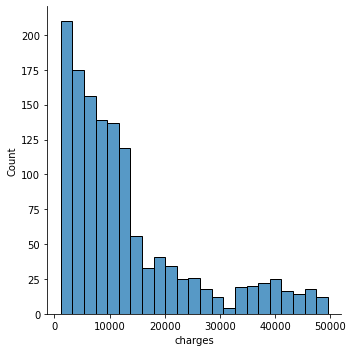

In [45]:
sns.displot(insurance.charges)
#введем категории трат на страховку

In [46]:
def get_stat_ins(stat):
    if stat <=  16000 :
        return 'Низкие траты'
    elif stat <= 32000 :
           return 'Средние траты'
    elif stat <= 50000 :
        return 'Большие траты'
    else:
            return stat

In [47]:
insurance['charges'].apply(get_stat_ins)

0       Средние траты
1        Низкие траты
2        Низкие траты
3       Средние траты
4        Низкие траты
            ...      
1333     Низкие траты
1334     Низкие траты
1335     Низкие траты
1336     Низкие траты
1337    Средние траты
Name: charges, Length: 1331, dtype: object

In [48]:
insurance['charges_cat'] = insurance['charges'].apply(get_stat_ins)

In [49]:
#проверим заивсимость среднего возраста и категории трат
insurance.groupby(['charges_cat'])['age'].mean()

charges_cat
Большие траты    39.371622
Низкие траты     38.924395
Средние траты    40.397906
Name: age, dtype: float64


##### <span style="color:blue">- Мы снова получаем черезмерно гомогенную связь. Тем не менее, исходя из нее, более молодые люди тратят меньше денег на страховку</span>

In [50]:
#проверим заивсимость среднего возраста и категории трат
insurance.groupby(['charges_cat'])['sex_cat'].mean()

charges_cat
Большие траты    0.635135
Низкие траты     0.486895
Средние траты    0.497382
Name: sex_cat, dtype: float64

<AxesSubplot:xlabel='sex'>

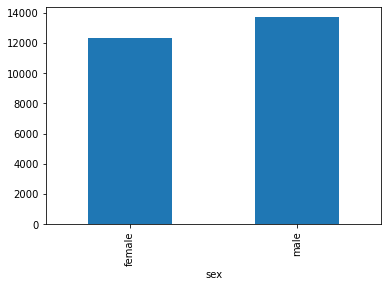

In [51]:
insurance.groupby(['sex'])['charges'].mean().plot(kind='bar')


##### <span style="color:blue">- Исходя из данных дата-сета, мужчины платят за страховку больше, чем женщины, причем мужчин осуществляющих бОльшие затраты также больше</span>

In [52]:
insurance.groupby(['charges_cat'])['bmi'].mean()

charges_cat
Большие траты    34.993243
Низкие траты     30.477823
Средние траты    28.068063
Name: bmi, dtype: float64

<AxesSubplot:xlabel='charges_cat,sex,healthy person'>

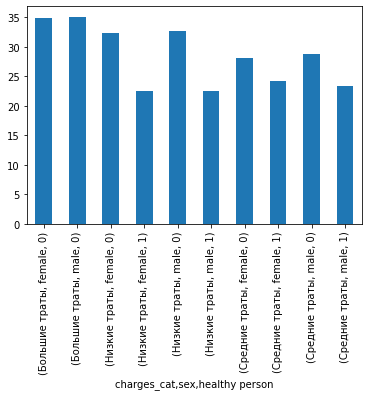

In [53]:
insurance.groupby(['charges_cat', 'sex', 'healthy person' ])['bmi'].mean().plot(kind='bar')

##### <span style="color:blue">- Самым большим BMI обладает категория нездоровых мужчины и женщины с большими тратами на страховку, а наименьшим BMI - категория здоровых мужчин и женщин с низкими тратами на страховку </span>

In [54]:
insurance.groupby(['healthy person'])['charges'].mean()

healthy person
0    14056.093441
1     7832.600917
Name: charges, dtype: float64

<AxesSubplot:xlabel='healthy person'>

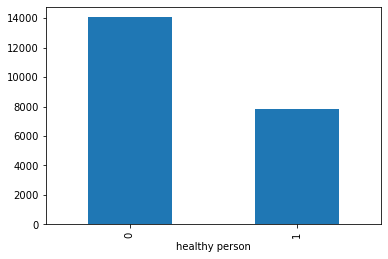

In [55]:
insurance.groupby(['healthy person'])['charges'].mean().plot(kind='bar')

##### <span style="color:blue">- Здоровые люди в среднем тратят почти в 2 раза меньше денег на мед. страховку, чем люди, ведущие нездоровый образ жизни</span>

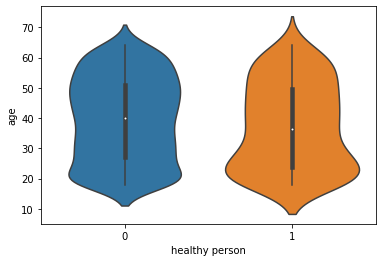

In [56]:
sns.violinplot(x=insurance['healthy person'], y=insurance['age'])
plt.show()

##### <span style="color:blue">- Больше всего здоровых людей в молодом возрасте </span>

<AxesSubplot:xlabel='children,region'>

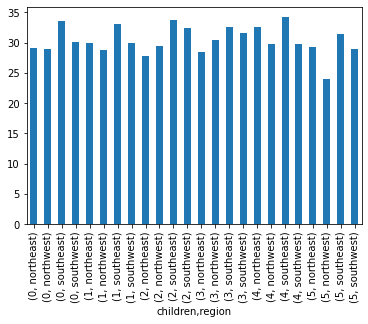

In [57]:
insurance.groupby(['children', 'region' ])['bmi'].mean().plot(kind='bar')

In [58]:
insurance.groupby(['children', 'region' ])['bmi'].mean()

children  region   
0         northeast    29.163265
          northwest    28.885496
          southeast    33.477419
          southwest    30.116788
1         northeast    29.947368
          northwest    28.702703
          southeast    33.052632
          southwest    29.935065
2         northeast    27.843137
          northwest    29.500000
          southeast    33.772727
          southwest    32.368421
3         northeast    28.461538
          northwest    30.355556
          southeast    32.600000
          southwest    31.540541
4         northeast    32.571429
          northwest    29.833333
          southeast    34.200000
          southwest    29.714286
5         northeast    29.333333
          northwest    24.000000
          southeast    31.333333
          southwest    29.000000
Name: bmi, dtype: float64

##### <span style="color:blue">- У людей с 5-ю детьми из региона севера-запад заметно ниже других индекс массы тела  </span>

In [59]:
insurance.groupby(['children', 'region' ])['bmi'].sum()

children  region   
0         northeast    4287.0
          northwest    3784.0
          southeast    5189.0
          southwest    4126.0
1         northeast    2276.0
          northwest    2124.0
          southeast    3140.0
          southwest    2305.0
2         northeast    1420.0
          northwest    1947.0
          southeast    2229.0
          southwest    1845.0
3         northeast    1110.0
          northwest    1366.0
          southeast    1141.0
          southwest    1167.0
4         northeast     228.0
          northwest     179.0
          southeast     171.0
          southwest     208.0
5         northeast      88.0
          northwest      24.0
          southeast     188.0
          southwest     232.0
Name: bmi, dtype: float64

##### <span style="color:blue">- Но выясняется, что такой человек всего лишь один, а значит вывод не релевантен  </span>

<AxesSubplot:title={'center':'Research'}, ylabel='charges'>

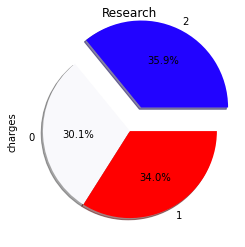

In [60]:
colors = ['#2203FF', '#F9F9FC', 'red']
insurance.groupby(['children_cat'])['charges'].mean().plot(kind='pie', 
                                                   colors = colors, title = 'Research', 
                                                   autopct = '%.1f%%', startangle = 360, explode = [0.3, 0, 0], shadow = True)

##### <span style="color:blue">- Наблюдается  взаимосвязь - чем больше детей, тем больше траты на страховку, но пока это только наблюдение  </span>

## <span style="color:orange">- Проверим пропуски</span>

<AxesSubplot:>

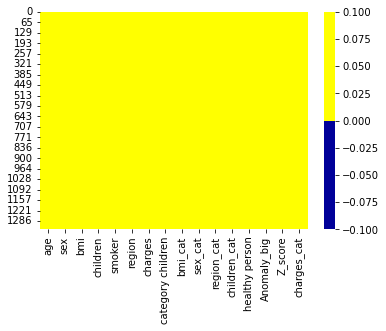

In [61]:
cols = insurance.columns
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(insurance[cols].isnull(), cmap=sns.color_palette(colours))

#Визуально видим, что пропущенных данных нет
#Проверим на числах

In [62]:
for col in insurance.columns:
    pct_missing = np.mean(insurance[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

age - 0%
sex - 0%
bmi - 0%
children - 0%
smoker - 0%
region - 0%
charges - 0%
category children - 0%
bmi_cat - 0%
sex_cat - 0%
region_cat - 0%
children_cat - 0%
healthy person - 0%
Anomaly_big - 0%
Z_score - 0%
charges_cat - 0%





## <span style="color:blue">- Нам повезло, в дата-сете нет пропусков</span>

## <span style="color:orange">- Проверим графики и корреляции</span>

In [63]:
grap = insurance.groupby(insurance['age'])['charges'].mean()

<BarContainer object of 47 artists>

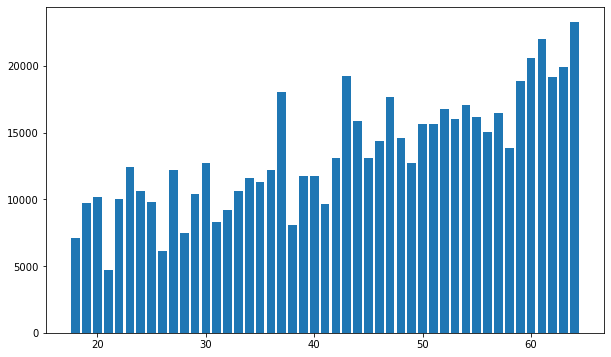

In [64]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(grap.index, grap)

#### Существует общий тренд на рост трат на мед. услуги с ростом возраста

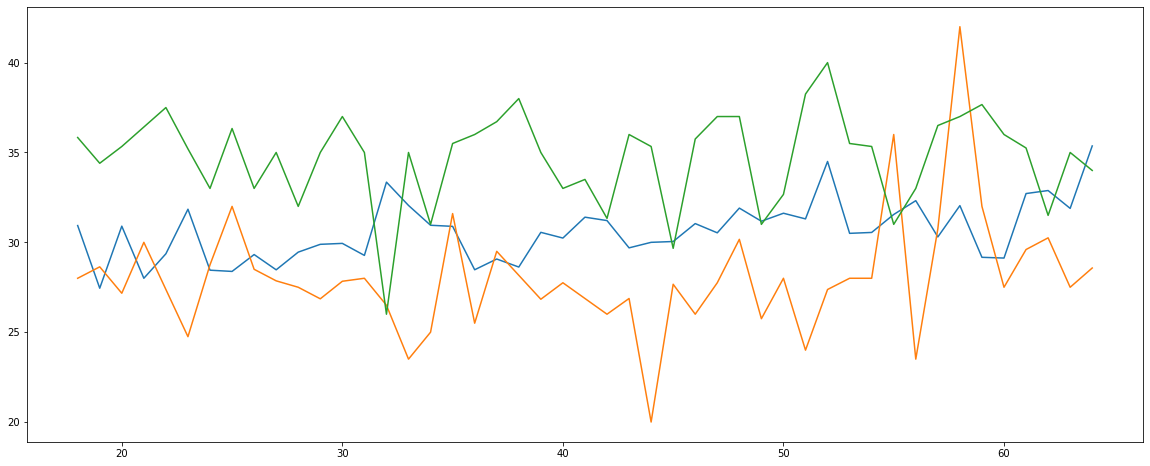

In [65]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(insurance.groupby(['charges_cat', 'age'])['bmi'].mean().loc['Низкие траты'])
ax.plot(insurance.groupby(['charges_cat', 'age'])['bmi'].mean().loc['Средние траты'])
ax.plot(insurance.groupby(['charges_cat', 'age'])['bmi'].mean().loc['Большие траты'])

#### Среди людей с низкими тратами на страхову наблюдаются менее заметные флуктуации по фактору bmi с ростом возраста

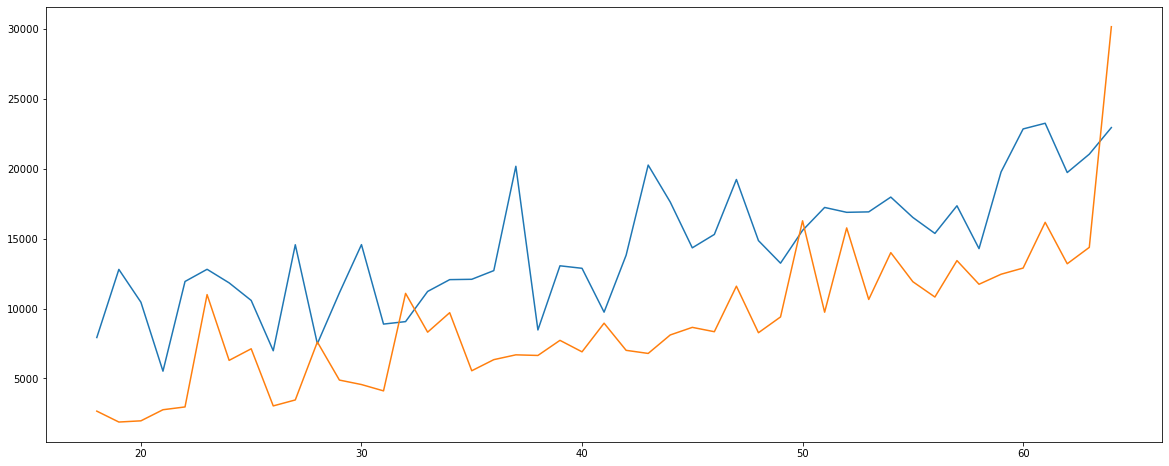

In [66]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(insurance.groupby(['healthy person', 'age'])['charges'].mean().loc[0])
ax.plot(insurance.groupby(['healthy person', 'age'])['charges'].mean().loc[1])

#### Зоровые и не здоровые люди с течением времени тратят в среднем больше денег на страховку, при этому в возрасте после 60 в данном дата-сете у нездоровых людей наблюдается резкий скачок на страховые издержки

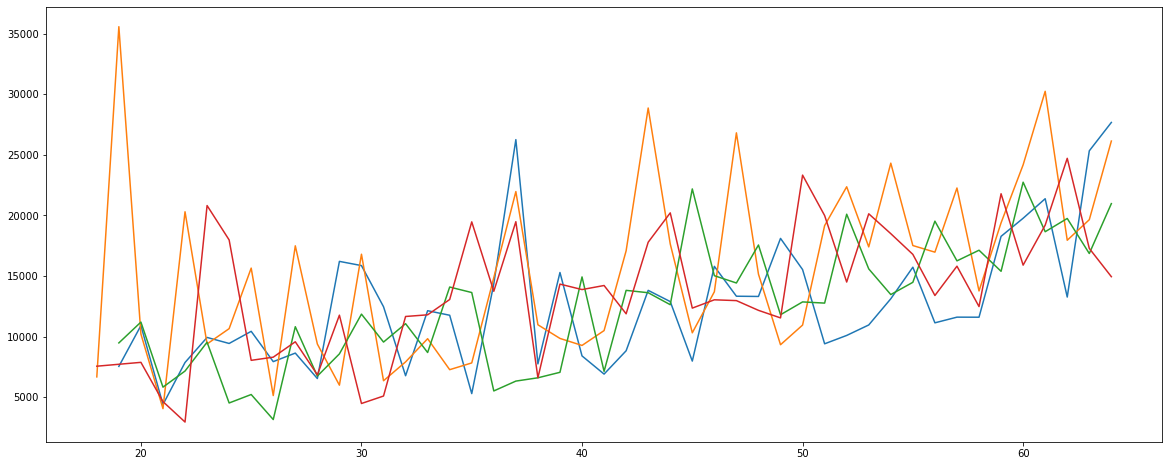

In [67]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(insurance.groupby(['region_cat', 'age'])['charges'].mean().loc[0])
ax.plot(insurance.groupby(['region_cat', 'age'])['charges'].mean().loc[1])
ax.plot(insurance.groupby(['region_cat', 'age'])['charges'].mean().loc[2])
ax.plot(insurance.groupby(['region_cat', 'age'])['charges'].mean().loc[3])

#### Жители региона юго-восток (southeast) показывают сильный всплеск трат на страховку в  возрасте 19 лет. Проверим кол-во таким людей

In [68]:
insurance[(insurance.region == 'southeast') & (insurance.age == 19)].shape

(3, 16)

#### Таких людей  = 3 , а значит нельзя трактовать, что здесь есть некая взаимосвязь

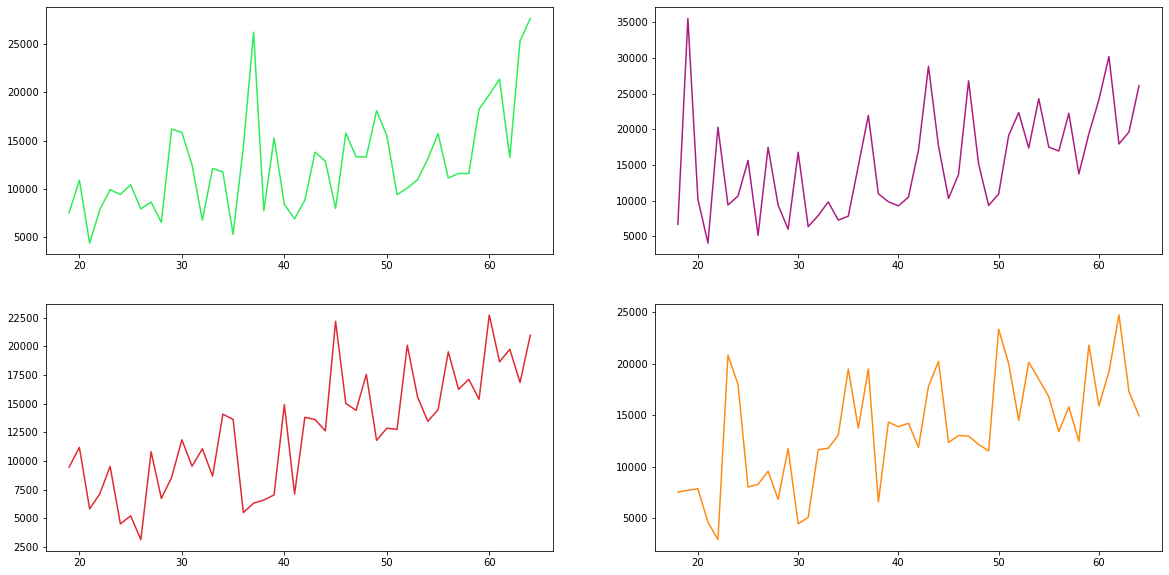

In [69]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

ax[0][0].plot(insurance.groupby(['region_cat', 'age'])['charges'].mean().loc[0], c='#2eed57')
ax[0][1].plot(insurance.groupby(['region_cat', 'age'])['charges'].mean().loc[1], c='#aa1c82')
ax[1][0].plot(insurance.groupby(['region_cat', 'age'])['charges'].mean().loc[2], c='#df2a31')
ax[1][1].plot(insurance.groupby(['region_cat', 'age'])['charges'].mean().loc[3], c='#ff8a11')



#### Для жителей всех 4х регионов присутствует тенденция роста трат на страховку с течением возраста 

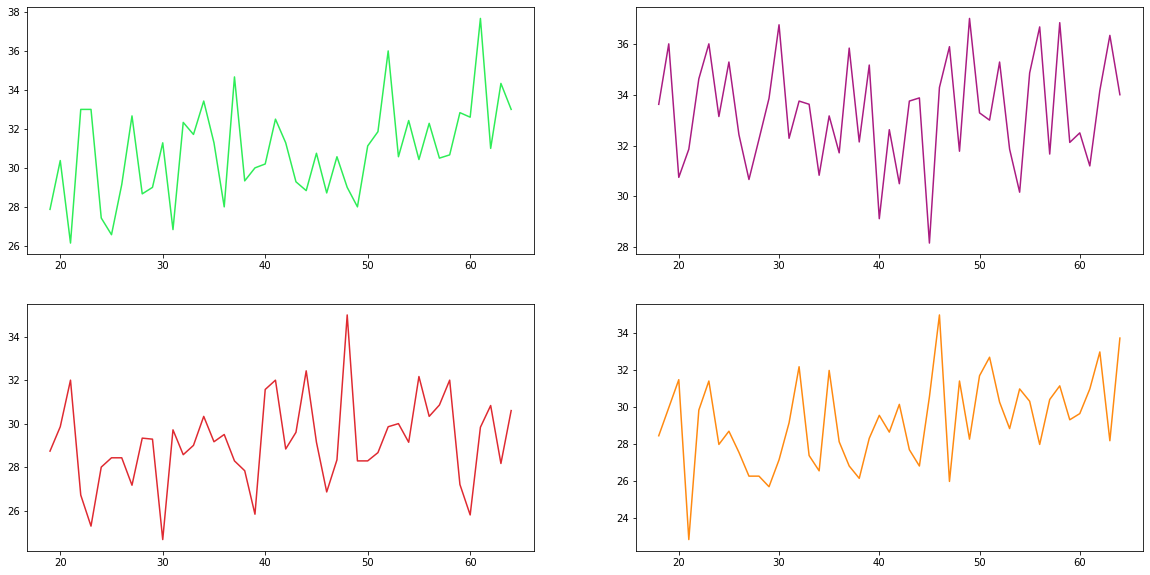

In [70]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

ax[0][0].plot(insurance.groupby(['region_cat', 'age'])['bmi'].mean().loc[0], c='#2eed57')
ax[0][1].plot(insurance.groupby(['region_cat', 'age'])['bmi'].mean().loc[1], c='#aa1c82')
ax[1][0].plot(insurance.groupby(['region_cat', 'age'])['bmi'].mean().loc[2], c='#df2a31')
ax[1][1].plot(insurance.groupby(['region_cat', 'age'])['bmi'].mean().loc[3], c='#ff8a11')

#### При этом, судя по графикам, индекс массы тела не сильно коррелирует с возрастом

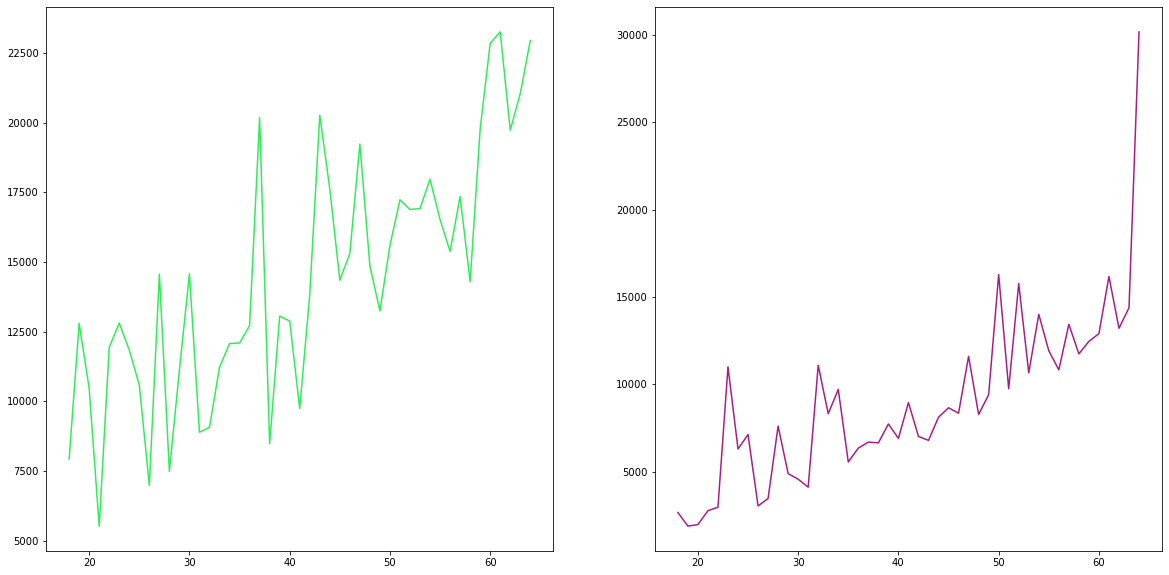

In [71]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

ax[0].plot(insurance.groupby(['healthy person', 'age'])['charges'].mean().loc[0], c='#2eed57')
ax[1].plot(insurance.groupby(['healthy person', 'age'])['charges'].mean().loc[1], c='#aa1c82')



#### Невзирая на ЗОЖ, здоровые люди все равно тратят больше денег на медицину с течение времени. Но, тем не менее, все равно в среднем меньше, чем люди не вудщие ЗОЖ

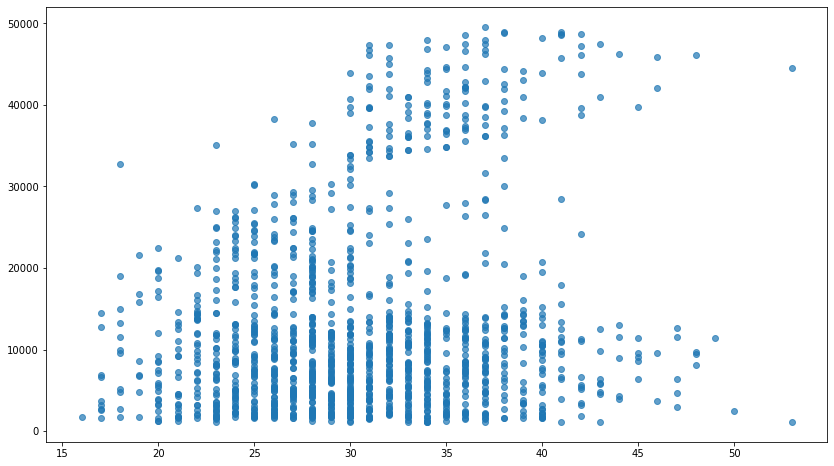

In [72]:
fig, ax = plt.subplots(figsize=(14,8))
graph = ax.scatter(insurance['bmi'], insurance['charges'], 
           alpha = 0.7)

### Данный график не дает никакой информации. Требуется взять среднее от bmi и charges, отфильтровать по возрасту и снова построить scatter

In [73]:
charges_avrg = insurance.groupby('age')['charges'].mean()
bmi_avrg = insurance.groupby('age')['bmi'].mean()


insurance_stat = pd.concat([charges_avrg, bmi_avrg], axis=1)

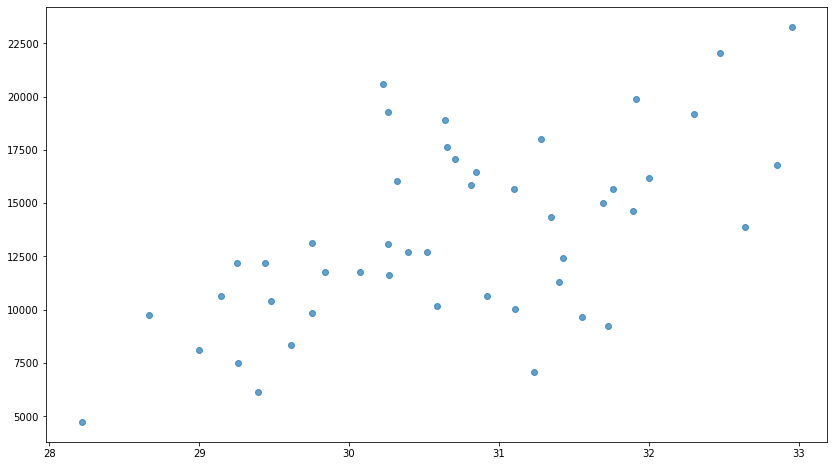

In [74]:
fig, ax = plt.subplots(figsize=(14,8))
graph = ax.scatter(insurance_stat['bmi'], insurance_stat['charges'], 
           alpha = 0.7)

In [75]:
# Посмотрим коэффицент корреляции внутри отфильтрованного по возрасту дата-сета между bmi и charges
insurance_stat.corr()

,charges,bmi
charges,1.000000,0.596394
bmi,0.596394,1.000000


## <span style="color:orange">- Отфильтровав по возрасту (взяв среднее) bmi и charges, видим заметную корреляцию с коэффицентом 0,6</span>

In [76]:
a = insurance.groupby('age')['charges'].mean()
b = insurance.groupby('age')['bmi'].mean()
c = insurance.groupby('age')['children'].mean()
d = insurance.groupby('age')['sex_cat'].mean()
e = insurance.groupby('age')['region_cat'].mean()
f = insurance.groupby('age')['healthy person'].mean()





insurance_stat_all = pd.concat([a,b,c,d,e,f], axis=1)

In [77]:
insurance_stat_all.corr()

,charges,bmi,children,sex_cat,region_cat,healthy person
charges,1.000000,0.596394,-0.121561,-0.541880,-0.079378,-0.288062
bmi,0.596394,1.000000,-0.149967,-0.384411,0.107136,-0.516123
children,-0.121561,-0.149967,1.000000,0.043955,-0.086444,-0.089179
sex_cat,-0.541880,-0.384411,0.043955,1.000000,0.059259,0.111995
region_cat,-0.079378,0.107136,-0.086444,0.059259,1.000000,-0.062793
healthy person,-0.288062,-0.516123,-0.089179,0.111995,-0.062793,1.000000


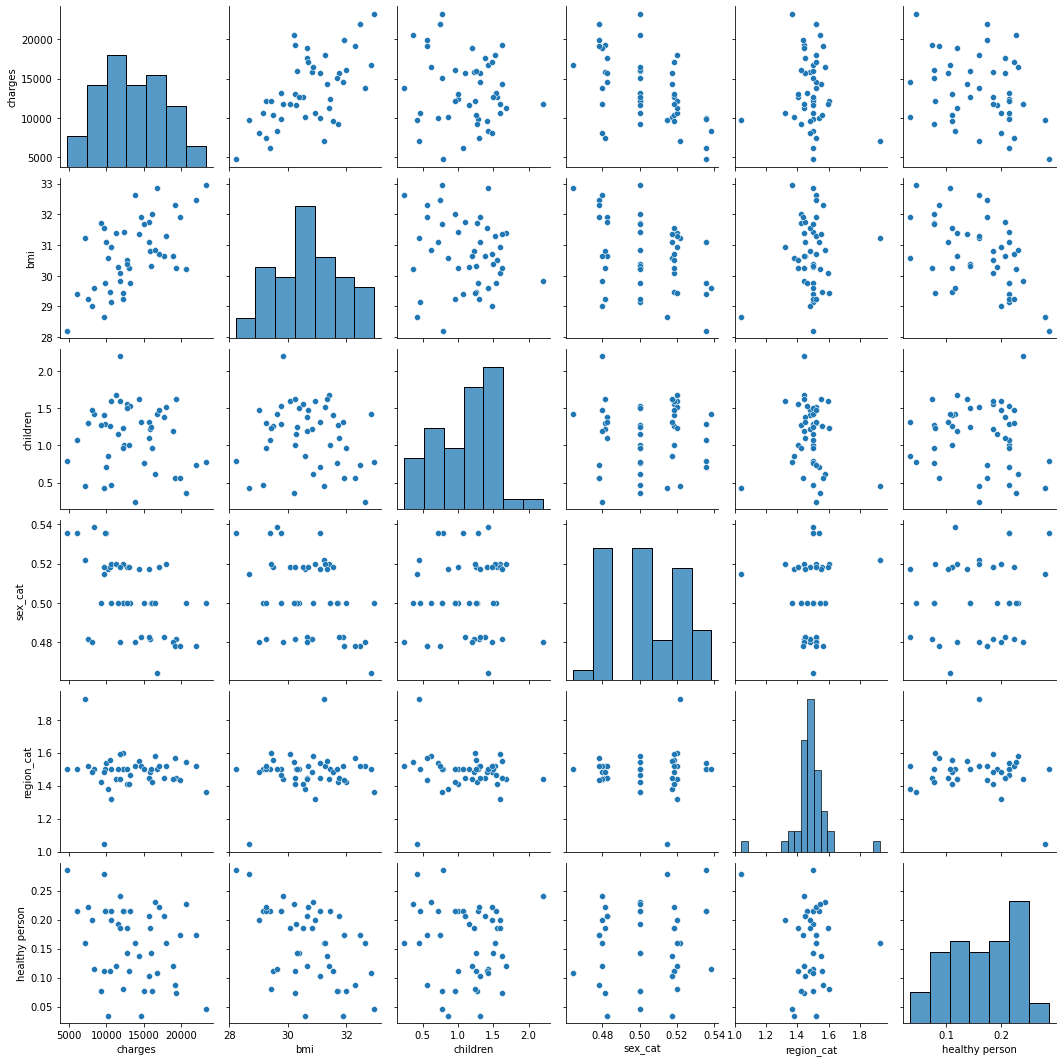

In [78]:
sns.pairplot(insurance_stat_all)

### <span style="color:blue">- На корреляции средних значений, можем обнаружить также заметную отрицательную корреляцию пола и траты на страховку. Также есть корреляци межуд ЗОЖ и bmi, но она спровоцирована мультиколлинеарностью. 


### <span style="color:orange">- Так или иначе, на подобных усредненых значениях трактовать корреляцию мы не можем. Посмотрим коэффиценты корреляции на полном дата-сете

In [79]:
insurance['children_cat'] = pd.factorize(insurance['children_cat'])[0]

In [80]:
cols_num = ['charges', 'bmi', 'children_cat', 'sex_cat', 'region_cat', 'healthy person', 'age','bmi_cat']

In [81]:
cols_num

['charges',
 'bmi',
 'children_cat',
 'sex_cat',
 'region_cat',
 'healthy person',
 'age',
 'bmi_cat']

In [82]:
correlation = insurance.corr().loc[cols_num, cols_num]

<AxesSubplot:>

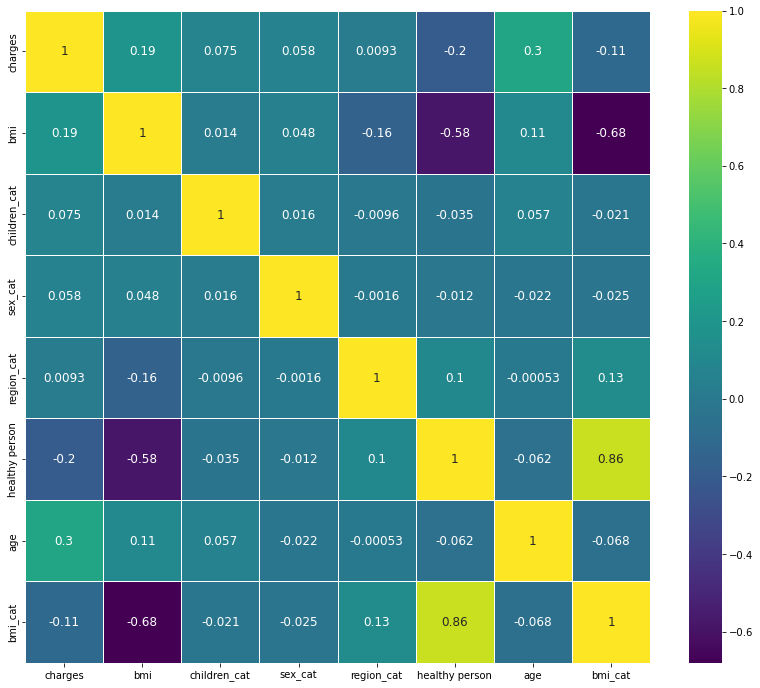

In [83]:
fig , ax = plt.subplots(figsize = (14,12))

sns.heatmap(correlation, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

### <span style="color:orange">- На полном дата-сете ни одной не мультиколлинеарной корреляции не обнаружено. Единственная слабая-малозначимая корреляция - расходы на мед. страховку и возраст 0,3. 

# <span style="color:purple">- В ходе анализа были замечены некоторые взаимосвязи и особенности отношений переменных. В качестве финального вывода, можно сказать, что данный дата-сет не является идеальным для подобного рода анализа. Также, к сожалению не было обнаружено ни одной корреляции не на усредненных значениях